Define a function and its derivative.

<Axes: >

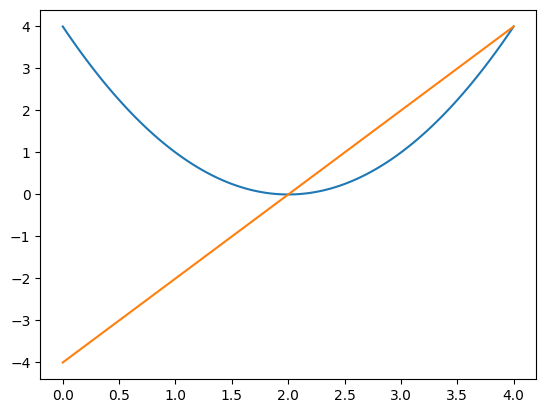

In [39]:
import numpy as np
import torch
import seaborn as sns
import matplotlib as plt
t=np.linspace(0,4,100)
x=torch.tensor(t,requires_grad=True)
y=torch.pow((x-2),2)
s=sum(y)
s.backward()
sns.lineplot(x=x.detach().numpy(),y=y.detach().numpy())
sns.lineplot(x=x.detach().numpy(),y=x.grad.detach().numpy())




The Autograd can only apply to scalar functions, that garantees that a parameter in the network can only have a scalar as gradient. That is what I was missing on my implementation of the gradient computations. With that the tensor a.grad has same dimensions as the tensor a.  

In [44]:
A = torch.tensor([[1.0, 2.0],[3.0,4.0]],requires_grad=True)
c = torch.tensor([1.,2.])
b=torch.matmul(A,c)
s1=sum(b)
s1.backward()

print(A.grad)
print(c.data)

tensor([[1., 2.],
        [1., 2.]])
tensor([1., 2.])


First Conjugate Gradient

In [51]:
def conjGradient(x,y,cauchy=0.0001,eta=0.1):
    xprev=x.detach().clone()+10
    xcur=x.detach().clone()
    while (torch.linalg.norm(xcur-xprev) > cauchy):
        xprev=xcur
        y.backward()
        x.data -= eta*x.grad
        x.grad.zero_()
        xcur=x.detach().clone()
        print(x.data)

x=torch.tensor([6.0],requires_grad=True)
y=torch.pow(x-2,2)
conjGradient(x,y,0.0001,0.1)


tensor([5.2000])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.